#### Categorical Features
* One common type of non-numerical data is categorical data.
* For example, imagine you are exploring some data on housing prices, and along with numerical features like `price` and `rooms`, you also have `neighborhood` information.
* For example, your data might look something like this:

In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [2]:
import numpy as np
import pandas as pd

In [28]:
df = pd.DataFrame(data)
df.head()

,price,rooms,neighborhood
0,850000,4,Queen Anne
1,700000,3,Fremont
2,650000,3,Wallingford
3,600000,2,Fremont


In [32]:
df.shape

(4, 3)

In [33]:
import seaborn as sns

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


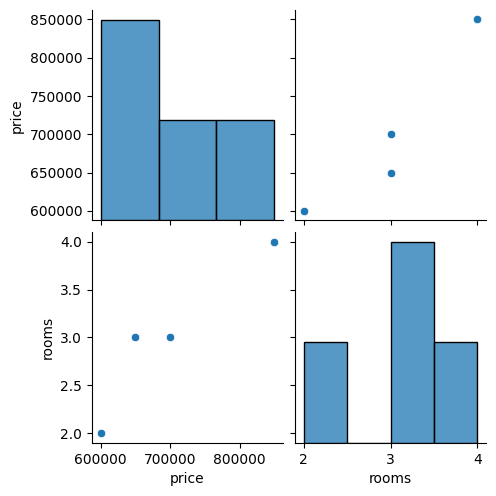

In [34]:
sns.pairplot(df)

You might be tempted to encode this data with a straightforward numerical mapping:

{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

* In this case, one proven technique is to use one-hot encoding, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively.
* When your data comes as a list of dictionaries, Scikit-Learn's DictVectorizer will do this for you:

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [10]:
vec = DictVectorizer(sparse=False,dtype=int)

In [11]:
vec

DictVectorizer(dtype=<class 'int'>, sparse=False)

In [14]:
ecode = vec.fit_transform(data)
ecode

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [17]:
col = vec.get_feature_names_out()

In [30]:
ecod_data = pd.DataFrame(ecode,columns=col)
ecod_data

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


In [35]:
ecod_data.shape

(4, 5)

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\s

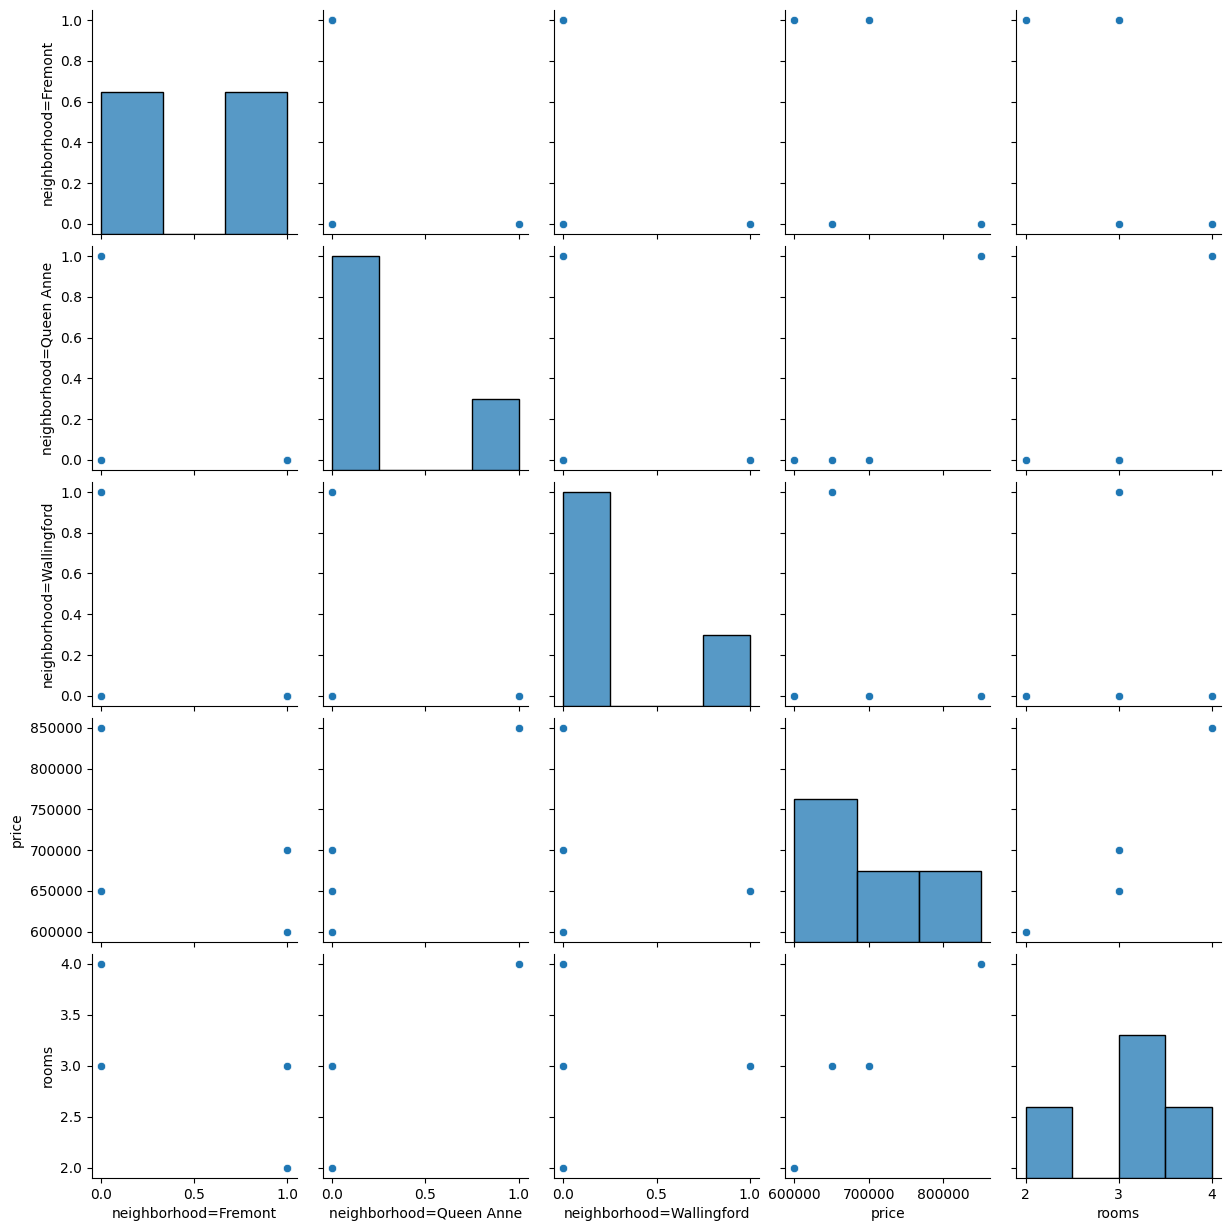

In [36]:
sns.pairplot(ecod_data)

In [21]:
vec = DictVectorizer(sparse=True, dtype=int)
X = vec.fit_transform(data)

In [22]:
X

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [23]:
X.toarray()

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [25]:
Features = vec.get_feature_names_out()
Features

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [26]:
pd.DataFrame(X.toarray(),columns=Features)

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


### Example : Diamond Quality

In [47]:
data = pd.read_csv("Dataset/diamond.csv")
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [49]:
# check value counts of Cut column
data['Cut'].value_counts()

Cut
Ideal              2482
Very Good          2428
Good                708
Signature-Ideal     253
Fair                129
Name: count, dtype: int64

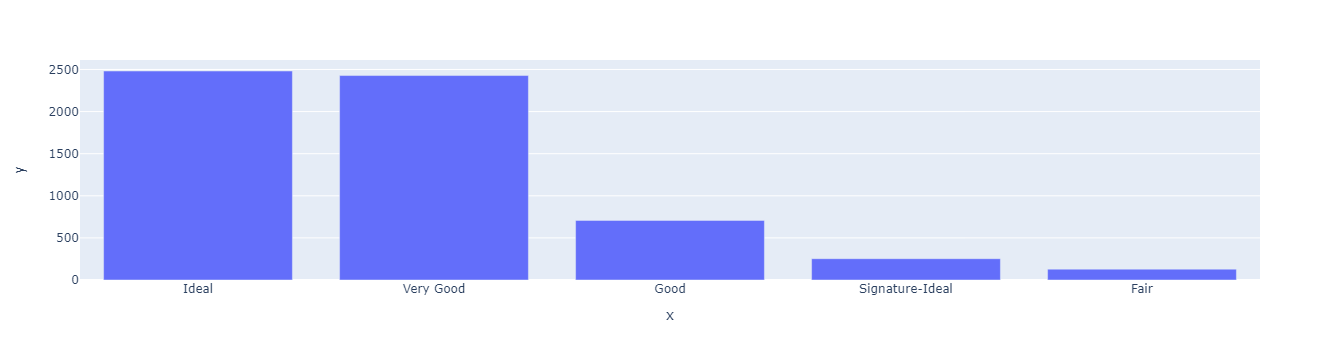

In [50]:
import plotly.express as px
cut_counts = data['Cut'].value_counts()
fig = px.bar(x=cut_counts.index, y=cut_counts.values)
fig.show()

In [51]:
pd.crosstab(index=data['Cut'], columns=data['Color'])

Color,D,E,F,G,H,I
Cut,,,,,,
Fair,12,32,24,21,24,16
Good,74,110,133,148,128,115
Ideal,280,278,363,690,458,413
Signature-Ideal,30,35,38,64,45,41
Very Good,265,323,455,578,424,383


In [52]:
pd.pivot_table(data, values='Price', index='Cut', columns='Color', aggfunc=np.mean)

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_24628\1741666182.py:1: FutureWarning:

The provided callable <function mean at 0x000002ABD9E291F0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



Color,D,E,F,G,H,I
Cut,,,,,,
Fair,6058.250000,5370.625000,6063.625000,7345.523810,5908.500000,4573.187500
Good,10058.716216,8969.545455,9274.007519,9988.614865,9535.132812,8174.113043
Ideal,18461.953571,12647.107914,14729.426997,13570.310145,11527.700873,9459.588378
Signature-Ideal,19823.100000,11261.914286,13247.947368,10248.296875,9112.688889,8823.463415
Very Good,13218.826415,12101.910217,12413.905495,12354.013841,10056.106132,8930.031332


In [53]:
d = {
    "fruit": ["apple", "banana", "orange", "apple"]
}

In [54]:
df1 = pd.DataFrame(d)
df1

,fruit
0,apple
1,banana
2,orange
3,apple


In [63]:
df_encoded = pd.get_dummies(df1['fruit'],dtype=int)

In [64]:
df_encoded

,apple,banana,orange
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
encoder = OneHotEncoder()

In [72]:
encoder_results = encoder.fit_transform(df1).toarray()
encoder_results                           

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [73]:
col = encoder.get_feature_names_out()

In [74]:
enc = pd.DataFrame(encoder_results,columns=col)

In [75]:
enc

,fruit_apple,fruit_banana,fruit_orange
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0


In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
le = LabelEncoder()

In [85]:
le_data = le.fit_transform(df1)
le_data

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([0, 1, 2, 0])

In [83]:
col = le.classes_
col

array(['apple', 'banana', 'orange'], dtype=object)

In [91]:
le_da = pd.DataFrame(le_data[:3],index=col)
le_da

,0
apple,0
banana,1
orange,2
